# 25 GB RAM

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import tweepy

import pandas as pd
import csv
import re
import string

consumer_key = '4Z8ObIRi6tO9p1'
consumer_secret = 'SU5ZNXTFpfRoA0ncTrPfbUy9JU95n123ETiqgNJ'
access_key = '1475412213296885760-Hx9KPcqXUPPdHuX'
access_secret = 'h8nh3NSfUZK6uBjdrsVsEfAtRpK'

auth = tweepy.OAuthHandler(
    consumer_key,
    consumer_secret,
    access_key,
    access_secret
)



api = tweepy.API(auth,wait_on_rate_limit=True)

hashtags = ['#LokSabhaElections2024', '#IndianElection2024', '#NarendraModi', '#BJP']
topics = ['Jobs', 'Religion', 'National Security', 'Agriculture', 'Employment', 'Demonetization']



# Open a CSV file to write the data
with open('tweets.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['User', 'Created at', 'Tweet', 'Hashtags'])

    # Search for tweets that contain the hashtags and topics
    for hashtag in hashtags:
        for topic in topics:
            tweets = api.search_tweets(q=hashtag + ' ' + topic + " -filter:retweets", count=500000 , tweet_mode='extended', lang='en')
            for tweet in tweets:
                # Remove links from the tweet text
                tweet_text = re.sub(r'http\S+', '', tweet.full_text)
                # Write the tweet data into the CSV file
                writer.writerow([tweet.user.screen_name, tweet.created_at, tweet_text, hashtag])

# print('Twitter data saved into tweets.csv file.')

# csvFile = open('file-name.csv', 'a')
# csvWriter = csv.writer(csvFile)


# for tweet in tweepy.Cursor(api.getSerac).items():
#     csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'),tweet.user.screen_name.encode('utf-8'), tweet.user.location.encode('utf-8')])

In [ ]:
import torch
import torchtext
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cpu


In [ ]:
# #DATASET --> https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset

df = pd.read_csv('/content/drive/MyDrive/Final semester/Sentiment140_filtered.csv', names=['label','tweet'], header = None, usecols = ['label', 'tweet'], encoding="ISO-8859-1")
# df = pd.read_csv('/content/drive/MyDrive/7th SEM Project/Sentiment140_filtered.csv', names=['label','tweet'], header = None, usecols = ['label', 'tweet'], encoding="ISO-8859-1")

# df = df.sample(frac = 1).reset_index(drop=True)

df = df.loc[1:100000]

df

,label,tweet
1,0,@cloudgazer If I cut the grass tomorrow aftern...
2,0,Just got homee! ... finally .. long day . tier...
3,0,"wants to be off already, but dreading going ho..."
4,0,I hate people that judge my tweets !
5,0,@ the office enfermita
...,...,...
99996,0,i do NOT want to go back and work now
99997,4,online &lt;3 also on youtube.
99998,0,@natalidelconte Wow it looks awesome. Wish Gla...
99999,0,i miss watching x-men again. haha i think i'l...


In [ ]:
df['label'] = df['label'].replace('4', '1')
df

,label,tweet
1,0,@cloudgazer If I cut the grass tomorrow aftern...
2,0,Just got homee! ... finally .. long day . tier...
3,0,"wants to be off already, but dreading going ho..."
4,0,I hate people that judge my tweets !
5,0,@ the office enfermita
...,...,...
99996,0,i do NOT want to go back and work now
99997,1,online &lt;3 also on youtube.
99998,0,@natalidelconte Wow it looks awesome. Wish Gla...
99999,0,i miss watching x-men again. haha i think i'l...


**FILTERING DATASET START**

In [ ]:
# df = tdf.loc[tdf['tweet'].str.count(' ')<= 40]
# df = tdf.loc[tdf.tweet.str.count(' ')<= 40]

# df

In [ ]:
# df.to_csv('/content/drive/MyDrive/7th SEM Project/Sentiment140_filtered.csv', index = False)

**FILTERING DATASET END**

In [ ]:
df['label'].value_counts()

0    50095
1    49905
Name: label, dtype: int64

In [ ]:
# sequence = []

# for i in range(len(df)):
#   sequence.append(df.tweet.str.count(' ')[i+1])

# import matplotlib.pyplot as plt

# plt.hist(sequence)

In [ ]:
import numpy as np

words = dict()

def add_to_dict(d, filename):
  with open(filename, 'r') as f:
    for line in f.readlines():
      line = line.split(' ')

      try:
        d[line[0]] = np.array(line[1:], dtype=float)
      except:
        continue

# add_to_dict(words, '/content/drive/MyDrive/7th SEM Project/glove.6B.50d.txt')
add_to_dict(words, '/content/drive/MyDrive/Final semester/glove.6B.50d.txt')
# words
len(words)

400000

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

tokenizer = nltk.RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# tokenizer.tokenize('@Puneetvizh @SamHarris2429 @shuchitasrivast @Trendsetting123 @SethLalits @KJSingh12518759 @priyankagandhi @fredhamilton @LambaAlka @RahulGandhi @SaddamSamsadINC @geetv79 @kukk44 @SujataIndia1st @priyapyadav18 @PadmraniK @rkmarar9 @WeThePeople3009 @inbred_mind @Subytweets @mrsinghCricUmp @Aakar__Patel @silvestercliff @Alwynmoras4870 @75 @PriyaaReturnz @BN34772728 @Pawankhera @kap_bee @AliyaAbbas @Stanalb @INCIndia @sonali210g @BrijeshNagar16 @SupriyaShrinate @kkhushal9 @mangellife29 @shirishag75 @allwynd1970 @srinivasiyc @TasilJazz @drshamamohd @Lord74891632 @watdehel @MonaAmbegaonkar @WilfredQuadros1 @BhavikaKapoor5 @ranjona Quality of jobs very low despite 9 years of Skill India, Stand Up India, Start Up India and many other quixotic schemes from #NarendraModi? Guess if you read files with "photogenic" memory, $#¡τ is bound to happen! https://t.co/lL5pez1xlZ')


In [ ]:
def message_to_token_list(s):
  tokens = tokenizer.tokenize(s)
  lowercased_tokens = [t.lower() for t in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
  useful_tokens = [t for t in lemmatized_tokens if t in words]
  return useful_tokens

# message_to_token_list('@Puneetvizh @SamHarris2429 @shuchitasrivast @Trendsetting123 @SethLalits @KJSingh12518759 @priyankagandhi @fredhamilton @LambaAlka @RahulGandhi @SaddamSamsadINC @geetv79 @kukk44 @SujataIndia1st @priyapyadav18 @PadmraniK @rkmarar9 @WeThePeople3009 @inbred_mind @Subytweets @mrsinghCricUmp @Aakar__Patel @silvestercliff @Alwynmoras4870 @75 @PriyaaReturnz @BN34772728 @Pawankhera @kap_bee @AliyaAbbas @Stanalb @INCIndia @sonali210g @BrijeshNagar16 @SupriyaShrinate @kkhushal9 @mangellife29 @shirishag75 @allwynd1970 @srinivasiyc @TasilJazz @drshamamohd @Lord74891632 @watdehel @MonaAmbegaonkar @WilfredQuadros1 @BhavikaKapoor5 @ranjona Quality of jobs very low despite 9 years of Skill India, Stand Up India, Start Up India and many other quixotic schemes from #NarendraModi? Guess if you read files with "photogenic" memory, $#¡τ is bound to happen! https://t.co/lL5pez1xlZ')

In [ ]:
def message_to_word_vectors(message, word_dict=words):
  processed_list_of_tokens = message_to_token_list(message)

  vectors = []

  for token in processed_list_of_tokens:
    if token not in word_dict:
      continue

    token_vector = word_dict[token]
    vectors.append(token_vector)

  return np.array(vectors, dtype=float)

message_to_word_vectors('@user when a father is dysfunctional and is').shape

(8, 50)

In [ ]:
new_df = df.sample(frac=1, random_state=1)
new_df.reset_index(drop=True, inplace=True)

# split_index_1 = int(len(df) * 0.75)
# split_index_2 = int(len(df) * 0.85)

# tra
# len(train_df), len(val_df), len(test_df)

split_index_1 = int(len(df) * 0.8)

train_df, val_df = new_df[:split_index_1], df[split_index_1:]

len(train_df), len(val_df)

(80000, 20000)

In [ ]:
def df_to_X_y(dataframe):
  # y = dataframe['label'].to_numpy().astype(int)
  # from sklearn.preprocessing import OneHotEncoder
  # enc = OneHotEncoder(sparse_output=False)
  # y = enc.fit_transform(train_df[['label']])

  all_word_vector_sequences = []

  for message in dataframe['tweet']:
    message_as_vector_seq = message_to_word_vectors(str(message))

    # if len(message_as_vector_seq) <= 40:     # ====================================>>>> Filtering out sentences with word count greater than 40
    if message_as_vector_seq.shape[0] == 0:
      message_as_vector_seq = np.zeros(shape=(1, 50))

    all_word_vector_sequences.append(message_as_vector_seq)
    message_as_vector_seq = []


  # return all_word_vector_sequences, y
  return all_word_vector_sequences

In [ ]:
# X_train, y_train = df_to_X_y(train_df)
X_train = df_to_X_y(train_df)

In [ ]:
print(len(X_train), len(X_train[2]))
print(len(X_train), len(X_train[0]))

80000 14
80000 13


(array([5.1524e+04, 2.7844e+04, 6.0300e+02, 9.0000e+00, 6.0000e+00,
        6.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1. ,  15.5,  30. ,  44.5,  59. ,  73.5,  88. , 102.5, 117. ,
        131.5, 146. ]),
 <BarContainer object of 10 artists>)

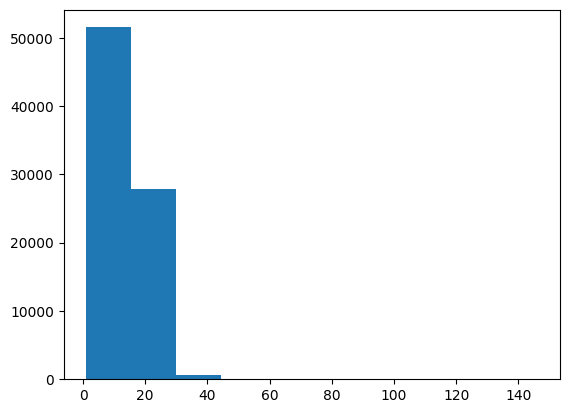

In [ ]:
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

import matplotlib.pyplot as plt

plt.hist(sequence_lengths)
# # print(sequence_lengths)
# print(sequence_lengths[:])


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.Series(sequence_lengths).describe()

count   80000.00
mean       13.04
std         7.35
min         1.00
25%         7.00
50%        12.00
75%        19.00
max       146.00
dtype: float64

In [ ]:
from copy import deepcopy


def pad_X(X, desired_sequence_length=65):
  X_copy = deepcopy(X)

  for i, x in enumerate(X):
    x_seq_len = x.shape[0]
    sequence_length_difference = desired_sequence_length - x_seq_len

    if sequence_length_difference < 0:
      X_copy[i] = np.zeros(shape=(65, 50))

    else:
      pad = np.zeros(shape=(sequence_length_difference, 50))
      X_copy[i] = np.concatenate([x, pad])



  return np.array(X_copy).astype(float)

In [ ]:
X_train = pad_X(X_train)

X_train.shape

(80000, 65, 50)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(sparse_output=False)
# y = enc.fit_transform(train_df[['label']])
# print(y)
y = train_df['label'].to_numpy().astype(int)

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# ct = ColumnTransformer([("Country", OneHotEncoder(), [0])], remainder = 'passthrough')
# y = ct.fit_transform(train_df[['category']])

In [ ]:
# y = y.toarray()
import sys
import numpy
# numpy.set_printoptions(threshold=sys.maxsize)
# numpy.set_printoptions(threshold=False)
y

# train_df[['category']].shape
# train_df['category'].value_counts()

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
# X_val, y_val = df_to_X_y(val_df)
X_val = df_to_X_y(val_df)
X_val = pad_X(X_val)

# y1 = enc.fit_transform(val_df[['label']])
y1 = val_df['label'].to_numpy().astype(int)
X_val.shape, y1.shape
# X_val.shape, y_val.shape

((20000, 65, 50), (20000,))

In [ ]:
# X_test, y_test = df_to_X_y(test_df)
# X_test = pad_X(X_test)

# X_test.shape, y_test.shape

In [ ]:
# X_train.shape, y_train.shape
X_train.shape, y.shape

((80000, 65, 50), (80000,))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([])

model.add(layers.Input(shape=(65, 50)))
# model.add(Dropout(rate=0.2, input_shape=X_train.shape[1:]))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
# model.add(layers.Dense(1,activation='softmax'))

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import ModelCheckpoint

# cp = ModelCheckpoint('model/', save_best_only=True)

# model.compile(optimizer=Adam(learning_rate=0.0001),
#               loss=BinaryCrossentropy(),
#               metrics=['accuracy', AUC(name='auc')])
model.compile(loss=BinaryCrossentropy(), optimizer= Adam(), metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer= Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 65, 64)            29440     
                                                                 
 dropout (Dropout)           (None, 65, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 65, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 65, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 65, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 65, 64)            0         
                                                                 
 flatten (Flatten)           (None, 4160)              0

In [ ]:
#Creating the LSTM model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64, input_shape = (65,50), return_sequences = False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1,activation='softmax'))

# opt = keras.optimizers.RMSprop( learning_rate=0.00005, rho=0.9, epsilon= None)
# model.compile(loss='sparse_categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.compile(loss=BinaryCrossentropy(), optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

In [ ]:
# weights = {0: frequencies.sum() / frequencies[0], 1: frequencies.sum() / frequencies[1]}
# weights

In [ ]:
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp], class_weight=weights)
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)
model.fit(X_train, y, validation_data=(X_val, y1), epochs=20)

Epoch 1/20
2500/2500 [==============================] - 56s 17ms/step - loss: 0.5622 - accuracy: 0.7070 - val_loss: 0.5126 - val_accuracy: 0.7501
Epoch 2/20
2500/2500 [==============================] - 43s 17ms/step - loss: 0.5079 - accuracy: 0.7513 - val_loss: 0.4885 - val_accuracy: 0.7643
Epoch 3/20
2500/2500 [==============================] - 42s 17ms/step - loss: 0.4824 - accuracy: 0.7673 - val_loss: 0.4847 - val_accuracy: 0.7685
Epoch 4/20
2500/2500 [==============================] - 43s 17ms/step - loss: 0.4644 - accuracy: 0.7808 - val_loss: 0.4432 - val_accuracy: 0.7942
Epoch 5/20
2500/2500 [==============================] - 41s 17ms/step - loss: 0.4501 - accuracy: 0.7891 - val_loss: 0.4415 - val_accuracy: 0.7955
Epoch 6/20
2500/2500 [==============================] - 41s 17ms/step - loss: 0.4370 - accuracy: 0.7965 - val_loss: 0.4250 - val_accuracy: 0.8031
Epoch 7/20
2500/2500 [==============================] - 40s 16ms/step - loss: 0.4243 - accuracy: 0.8032 - val_loss: 0.4080 -

#SAVE MODEL AND LOAD MODEL

In [ ]:
model.save('/content/drive/MyDrive/Final semester/Default_model.h5')
# model.save('/content/drive/MyDrive/7th SEM Project/LSTM_model.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Final semester/Default_model.h5')
# model = keras.models.load_model('/content/drive/MyDrive/7th SEM Project/Default_model.h5')

In [ ]:
score_val = model.evaluate(X_val, y1, verbose = 0)
# score_test = model.evaluate(X_test, y_test, verbose = 0)
# print(model.metrics_names)
print('Score Val')
print('Test loss:', score_val[0])
print('Test accuracy:', score_val[1])
# print('Score Test')
# print('Test loss:', score_test[0])
# print('Test accuracy:', score_test[1])

Score Val
Test loss: 0.3070613741874695
Test accuracy: 0.8796499967575073


In [ ]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/7th SEM Project/IndianPoliticalTweets22-23.csv', names=['a','b','c','tweet','d','e'], header = None, usecols = ['tweet'], encoding="ISO-8859-1")
df = pd.read_csv('/content/drive/MyDrive/Final semester/tweets.csv', names=['a','b','c','tweet','d','e'], header = None, usecols = ['tweet'], encoding="ISO-8859-1")
df = df.loc[1:50000]

# Define the keywords you want to search for
bjp_keywords = ['NarendraModi', 'narendramodi', 'Narendra Modi', 'narendra modi', 'Modi', 'modi', 'BJP', 'bjp', 'BharatiyaJanataParty', 'bharatiyajanataparty', 'bharatiya janata party']
inc_keywords = ['RahulGandhi', 'rahulgandhi', 'Rahul Gandhi', 'rahul gandhi', 'Gandhi', 'gandhi', 'INC', 'inc', 'IndianNationalCongress', 'indiannationalcongress', 'Indian National Congress', 'indian national congress', 'congess']

# Filter the DataFrame based on the keywords
bjp_df = df[df['tweet'].str.contains('|'.join(bjp_keywords), na=False)]
inc_df = df[df['tweet'].str.contains('|'.join(inc_keywords), na=False)]

# Display the filtered DataFrame
print(bjp_df)
print(inc_df)

# filtered_df.to_csv('BJP.csv', index = False)
# bjp_df.to_csv('/content/drive/MyDrive/7th SEM Project/BJP.csv', index = False)
# inc_df.to_csv('/content/drive/MyDrive/7th SEM Project/INC.csv', index = False)
bjp_df.to_csv('BJP.csv', index = False)
inc_df.to_csv('INC.csv', index = False)


                                                   tweet
5      @annamalai_k @narendramodi A state level presi...
6      @IAMCouncil @POTUS @Ilhan @bridgeinit OK this ...
33         Narendra Modi is a legend of Indian politics.
35     At present, the biggest strategist of Indian p...
57     @scribe_it I think generally BJP and Indian Go...
...                                                  ...
49955  @KrisNair1 @jsbisht555 @KulrajanWadhwa @Adil_I...
49962  @sarat65neog @LokSabhaSectt @PoliticsIndians @...
49984  @kalpesh97611832 @JeetuNahar11 @Radhika_Khera ...
49994  @ashajadeja325 Intellectuals can get printed a...
49997  @kaushikcbasu Cong ruled for 60 +yrs at center...

[7669 rows x 1 columns]
                                                   tweet
1      @vinodkapri @RahulGandhi Respected Indian Citi...
2      *Respected Indian Citizens,* Namaskaar I Am Th...
3      1/n-Meet Filmmaker Prakash Jha in New Jersey t...
4      @MrinalWahal Why would politicians stop using ...
40    

In [ ]:
bjp_pred = df_to_X_y(bjp_df)
bjp_pred_pad = pad_X(bjp_pred)
# bjp_pred_pad
# X_pred_pad.shape

In [ ]:
inc_pred = df_to_X_y(inc_df)
inc_pred_pad = pad_X(inc_pred)
# inc_pred_pad

In [ ]:
# inc_df = inc_df.reset_index(drop=True)
# inc_df

In [ ]:
# bjp_df = bjp_df.reset_index(drop=True)
# bjp_df

In [ ]:
# sequence = []

# for i in range(len(inc_df)):
#   sequence.append(inc_df.tweet.str.count(' ')[i])

# import matplotlib.pyplot as plt

# plt.hist(sequence)

In [ ]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.Series(sequence_lengths).describe()

In [ ]:
from tensorflow import keras

# # Step 1: Load the model
# model = keras.models.load_model('path_to_model/model.h5')

# # Step 2: Prepare input data
# input_data = preprocess_input(test_data)
import sys
import numpy
# Step 3: Make predictions
# predictions = model.predict(bjp_pred_pad)
bjp_predictions = (model.predict(bjp_pred_pad) > 0.5).astype(int)
inc_predictions = (model.predict(inc_pred_pad) > 0.5).astype(int)
# print(predictions)
# Step 4: Interpret the predictions
# predicted_classes = predictions.argmax(axis=-1)
# predicted_labels = [np.argmax(prediction) for prediction in predictions]

# Print the predicted labels

# numpy.set_printoptions(threshold=sys.maxsize)

print(bjp_predictions)

# numpy.set_printoptions(threshold=False)

244/244 [==============================] - 8s 31ms/step
[[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [ ]:
bjp_df = bjp_df.reset_index(drop=True)
result_bjp = pd.DataFrame(bjp_predictions, columns=['label'])
result = pd.concat([bjp_df,result_bjp], axis=1)
result.to_csv('/content/drive/MyDrive/Final semester/bjp_report.csv', index=False)

In [ ]:
inc_df = inc_df.reset_index(drop=True)
result_inc = pd.DataFrame(inc_predictions, columns=['label'])
result = pd.concat([inc_df,result_inc], axis=1)
result.to_csv('/content/drive/MyDrive/Final semester/inc_report.csv', index=False)

In [ ]:
result_bjp['label'].value_counts()[1]

3879

In [ ]:
result_inc['label'].value_counts()[1]

4124

In [ ]:
bjp_report_df = pd.read_csv("/content/drive/MyDrive/Final semester/bjp_report.csv")
inc_report_df = pd.read_csv("/content/drive/MyDrive/Final semester/inc_report.csv")

In [ ]:
bjp_report_df['label'].value_counts()[1]

3879